<a href="https://colab.research.google.com/github/shijisimon/EDA/blob/main/car_evaluation_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import train_test_split
import numpy as np
%matplotlib inline

In [3]:
data=pd.read_csv('/content/car_evaluation.csv')
data


,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [4]:
# assigning column names 
data.columns = ["buying","maint","doors","persons","lug_boot","safety","value"]
data.head()

,buying,maint,doors,persons,lug_boot,safety,value
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   value     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
data.describe()

,buying,maint,doors,persons,lug_boot,safety,value
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [13]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
value       0
dtype: int64

In [17]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1722    False
1723    False
1724    False
1725    False
1726    False
Length: 1727, dtype: bool

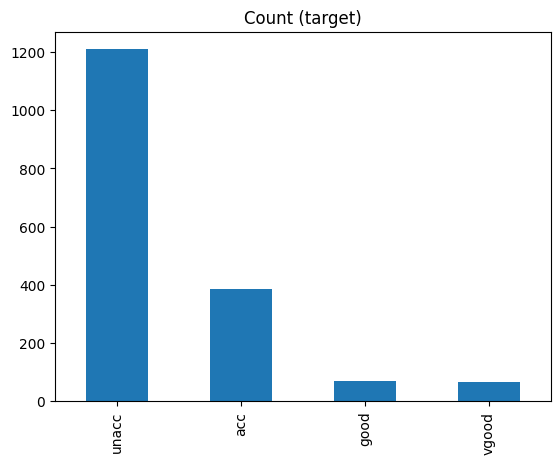

In [5]:
# to view class distribution
data.value.value_counts().plot(kind='bar', title='Count (target)');

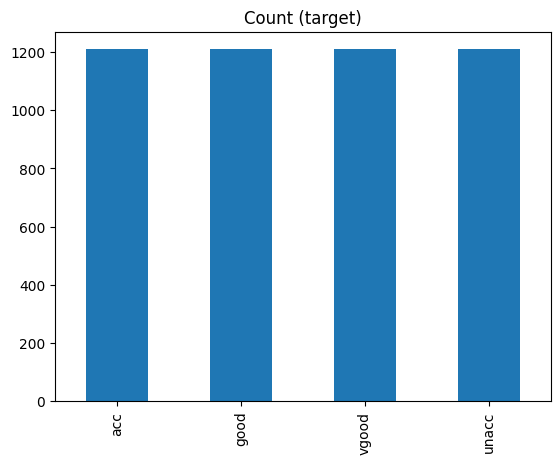

In [9]:
# Class count
class_count = data.value.value_counts()
# for oversampling getting the max count
max_class = max(class_count)

# Divide DataFrame by class
df_class_0 = data[data['value'] == "acc"]
df_class_1 = data[data['value'] == "good"]
df_class_2 = data[data['value'] == "unacc"]
df_class_3 = data[data['value'] == "vgood"]

#Oversampling
df_class_0_over = df_class_0.sample(max_class,replace = True)
df_class_1_over = df_class_1.sample(max_class,replace = True)
# df_class_2_over = df_class_2.sample(max_class) # not using maximum class
df_class_3_over = df_class_3.sample(max_class,replace = True)

data_os = pd.concat([df_class_0_over,df_class_1_over,df_class_3_over,df_class_2], axis = 0)
data_os.value.value_counts().plot(kind='bar', title='Count (target)');


In [10]:
# data cleansing
data_os.doors = data_os.doors.replace({"5more": 5}) 
# data_os.doors = data_os.doors.replace({"3":2,"5":4,"2":2,"4":4,5:4})
data_os.persons = data_os.persons.replace({"more": 5})
data_os.head()

,buying,maint,doors,persons,lug_boot,safety,value
388,vhigh,low,4,4,small,high,acc
1041,med,high,4,4,big,med,acc
1144,med,med,4,4,small,high,acc
415,vhigh,low,5,4,small,high,acc
321,vhigh,med,5,5,big,med,acc


In [11]:
# label encoding
map1 = {"low" : 1, "med":2,"high":3, "vhigh": 4}
map2 = {"small" : 1, "med":2,"big":3}
data_os["buying"] = data_os["buying"].map(map1)
data_os["maint"] = data_os["maint"].map(map1)
data_os["safety"] = data_os["safety"].map(map1)
data_os["lug_boot"] = data_os["lug_boot"].map(map2)
data_os.head()

,buying,maint,doors,persons,lug_boot,safety,value
388,4,1,4,4,1,3,acc
1041,2,3,4,4,3,2,acc
1144,2,2,4,4,1,3,acc
415,4,1,5,4,1,3,acc
321,4,2,5,5,3,2,acc


In [14]:
data_os["doors"]  = pd.to_numeric(data_os["doors"])
data_os["persons"] = pd.to_numeric(data_os["persons"])
data_os["car_type"] = data_os["doors"]+data_os["persons"] # created feature
type_dict = {4:"Coupe",
             5:"Coupe",
            6:"GT",
            7:"Sedan",
            8:"Hatchback",
            9:"SUV",
            10:"SUV"}
# data_os["car_type"] = data_os["car_type"].map(type_dict)

# set(data_os["car_type"].values.tolist())
data_os["car_type"] = data_os["car_type"].astype('category')
target = ['value']
reject = target
features = [x for x in data_os.columns if x not in reject]
x = data_os[features]
y = data_os[target]
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.25, random_state = 0)
print(xTrain.shape)
print(xTest.shape)

(3627, 7)
(1209, 7)


In [15]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_jobs=-1,random_state=51)

model.fit(xTrain,yTrain)
print(model.score(xTest,yTest))
print(sklearn.metrics.f1_score(yTest,model.predict(xTest),average='macro'))

<ipython-input-15-57d3a7aec0ec>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xTrain,yTrain)


0.9958643507030603
0.9958027104912519
